<a href="https://colab.research.google.com/github/Brama17/Hyper-Tunning-Analysis/blob/main/Hyper_Tunning_Analysis_Harwian_Brama_E_P_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama = Harwian Brama Enggar Pramukti
- Batch = DS 32 A+

# Hyperparameter Tuning with Python

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import Datasets
* Telco Churn (assignment)

In [ ]:
# load datasets
df = pd.read_csv('/content/drive/MyDrive/ASSIGMENT DIBIMBING/DAY 38 HYPERTUNING ANALYSIS /churn(1).csv')

In [ ]:
# show first 5 columns of data
# data dictionary can be found at
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


## Data Dictionary

| No. | Column Name        | Data Type | Non-Null Count | Description                                                             |
| --- | ------------------ | --------- | -------------- | ----------------------------------------------------------------------- |
| 1   | `customerID`       | object    | 7037           | ID unik untuk setiap pelanggan.                                         |
| 2   | `Gender`           | object    | 7030           | Jenis kelamin pelanggan (`Male`, `Female`).                             |
| 3   | `SeniorCitizen`    | float64   | 7034           | Apakah pelanggan adalah warga senior (0 = Tidak, 1 = Ya).               |
| 4   | `Partner`          | object    | 7030           | Apakah pelanggan memiliki pasangan (`Yes`, `No`).                       |
| 5   | `Dependents`       | object    | 7027           | Apakah pelanggan memiliki tanggungan anak/keluarga.                     |
| 6   | `Tenure`           | float64   | 7029           | Lama waktu berlangganan (dalam bulan).                                  |
| 7   | `PhoneService`     | object    | 7028           | Apakah pelanggan menggunakan layanan telepon (`Yes`, `No`).             |
| 8   | `PaperlessBilling` | object    | 7033           | Apakah pelanggan memilih tagihan elektronik.                            |
| 9   | `PaymentMethod`    | object    | 7035           | Metode pembayaran yang digunakan (`Credit card`, `Bank transfer`, dll). |
| 10  | `MonthlyCharges`   | float64   | 7036           | Jumlah tagihan bulanan pelanggan.                                       |
| 11  | `TotalCharges`     | float64   | 7046           | Total tagihan sejak awal berlangganan.                                  |
| 12  | `Churn`            | object    | 7046           | Apakah pelanggan berhenti berlangganan (`Yes`, `No`).                   |


Dataset terdiri dari 7046 entri dan 12 fitur.

## Duplicate Handling

In [ ]:
df.duplicated().sum()

np.int64(14)

Terdapat 14 Baris yang merupakan duplikat sempurna dari baris lain dalam DataFrame sehingga wajib melakukan Handling (Drop)

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

## Handling Missing Value

In [ ]:
df.isnull().sum()

,0
customerID,9
Gender,15
SeniorCitizen,12
Partner,16
Dependents,19
Tenure,17
Contract,13
PaperlessBilling,13
PaymentMethod,11
MonthlyCharges,10


Terdapat Missing pada beberapa kolom, sehingga perlu dilakukan Handling Missing Value agar memastikan data bersih

In [ ]:
# 1. Hapus baris dengan customerID kosong
df = df[df['customerID'].notnull()]

# 2. Hapus semua baris yang masih memiliki missing value
df = df.dropna()

# 3. Reset index agar rapi
df = df.reset_index(drop=True)

# 4. Cek kembali apakah masih ada missing value
print(df.isnull().sum())

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Data Sudah Clean dan siap untuk proses selanjutnya

In [ ]:
print(df.shape)

(6898, 12)


Setelah melakukan Handling Duplicate dan Missing Value data terdiri dari 6898 entri dan 12 fitur

# Split Data Set

## Pembagian Dataset (Train/Val/Test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Target encoding
df['Churn'] = df['Churn'].map({"No": 0, "Yes": 1})

# Pembagian Dataset
categorical_cols = df.select_dtypes(include='object').columns
oe = OrdinalEncoder()
df[categorical_cols] = oe.fit_transform(df[categorical_cols])

Target (Churn) diubah menjadi: "Yes" → 1, "No" → 0.

Fitur kategorikal lain (seperti Gender, Contract, dll) dikodekan dengan OrdinalEncoder, bukan get_dummies(), agar proses lebih ringan dan cepat.

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

Train (60%)

Validation (20%)

Test (20%)

## Analisis Korelasi & Seleksi Fitur

In [ ]:
# Analisis Korelasi
correlation = df.corr(numeric_only=True)
print("\nKorelasi terhadap Churn:")
print(correlation['Churn'].sort_values(ascending=False))


Korelasi terhadap Churn:
Churn               1.000000
MonthlyCharges      0.194158
PaperlessBilling    0.193602
SeniorCitizen       0.150304
PaymentMethod       0.107365
Gender             -0.006454
customerID         -0.013196
Partner            -0.151734
Dependents         -0.163287
TotalCharges       -0.196383
Tenure             -0.351332
Contract           -0.394238
Name: Churn, dtype: float64


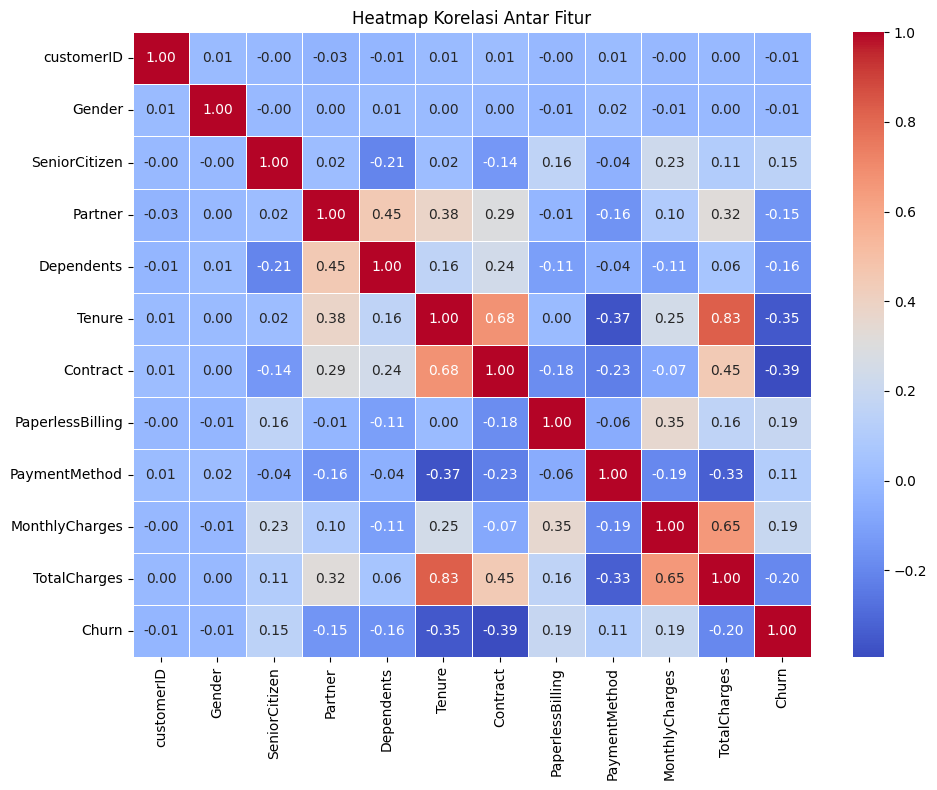

In [ ]:
# Visualisasi heatmap korelasi semua fitur
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.tight_layout()
plt.show()


**Fitur yang Paling Informatif:**
- Contract – pelanggan dengan kontrak jangka panjang lebih kecil kemungkinannya untuk churn.

- Tenure – semakin lama pelanggan bertahan, semakin kecil kemungkinannya untuk churn.

- MonthlyCharges & PaperlessBilling – korelasi positif dengan churn (mungkin tagihan tinggi atau sistem billing tidak disukai).

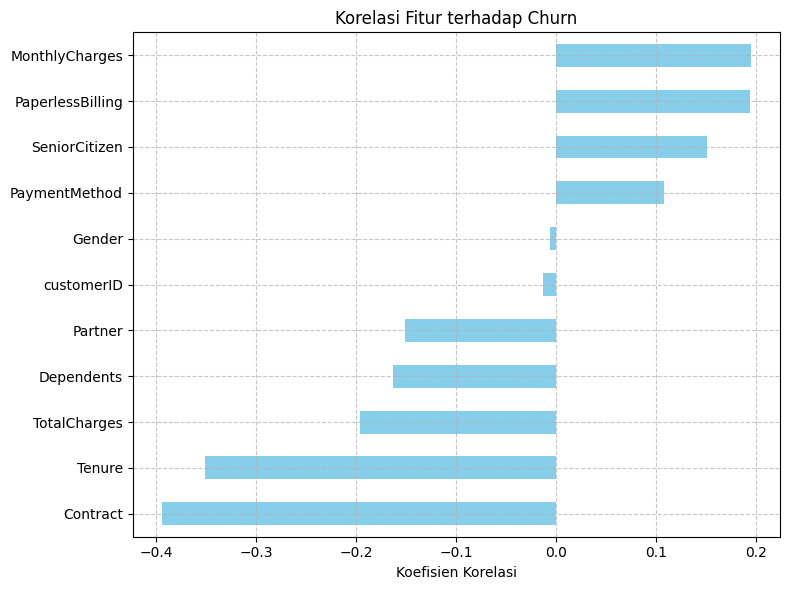

In [ ]:
# Visualisasi korelasi fitur terhadap Churn (bar chart)
churn_corr = correlation['Churn'].drop('Churn').sort_values()
plt.figure(figsize=(8, 6))
churn_corr.plot(kind='barh', color='skyblue')
plt.title("Korelasi Fitur terhadap Churn")
plt.xlabel("Koefisien Korelasi")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

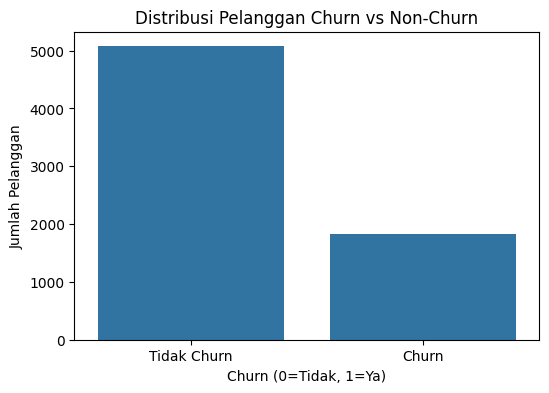

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Pelanggan Churn vs Non-Churn')
plt.xlabel('Churn (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Pelanggan')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.show()

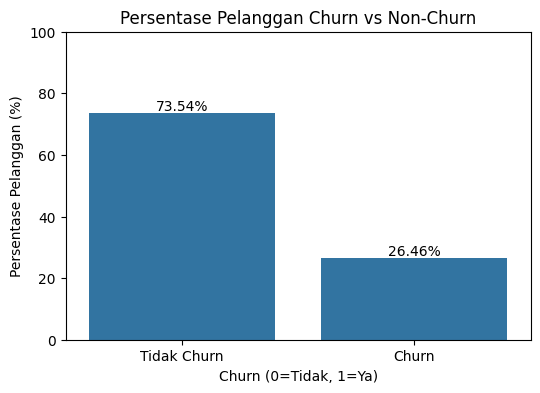

## Pemilihan Metrik Evaluasi

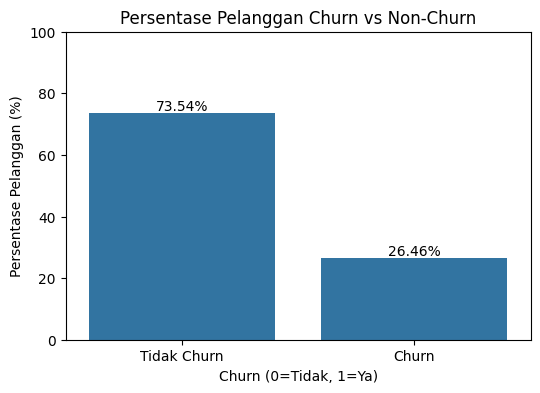

In [ ]:
churn_counts = df['Churn'].value_counts()
churn_percentages = churn_counts / len(df) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_percentages.index, y=churn_percentages.values)
plt.title('Persentase Pelanggan Churn vs Non-Churn')
plt.xlabel('Churn (0=Tidak, 1=Ya)')
plt.ylabel('Persentase Pelanggan (%)')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])

# Add percentage labels on top of the bars
for i, percentage in enumerate(churn_percentages.values):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.ylim(0, 100) # Set y-axis limit to 100%
plt.show()

** Pemilihan Matrix**
- Recal Recall (Sensitiv)
==> Mengukur seberapa banyak pelanggan yang benar-benar churn berhasil dideteksi oleh model.

- F1 Score ==> Harmonik antara precision dan recall, berguna saat terjadi class imbalance

Sehingga berdasarkan data yang dimiliki yaitu Tidak Churn 73.54% dan Churn 26.46% lebih baik menggunakan F1 Score karena memberikan keseimbangan antara Recall dan Precission, Model ini juga lebih optimal pada penggunaan cost untuk mencegah potensi churn (Penerapan Diskon dan Treatment kepada customer yang rentan Churn)

## Modelling

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### Model Normal (Tidak Tunning)

In [ ]:
model_default = RandomForestClassifier(random_state=42)
model_default.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluasi Model Non Tunning

In [ ]:
# Evaluasi pada validation set
from sklearn.metrics import f1_score, recall_score

y_val_pred_def = model_default.predict(X_val)
y_val_proba_def = model_default.predict_proba(X_val)[:, 1]
print("=== Model Tanpa Tuning (Validation Set) ===")
print("ROC AUC:", roc_auc_score(y_val, y_val_proba_def))
print("F1 Score:", f1_score(y_val, y_val_pred_def))
print("Recall:", recall_score(y_val, y_val_pred_def))
print(classification_report(y_val, y_val_pred_def))

# Evaluasi pada test set
y_test_pred_def = model_default.predict(X_test)
y_test_proba_def = model_default.predict_proba(X_test)[:, 1]
print("\n=== Model Tanpa Tuning (Test Set) ===")
print("ROC AUC:", roc_auc_score(y_test, y_test_proba_def))
print("F1 Score:", f1_score(y_test, y_test_pred_def))
print("Recall:", recall_score(y_test, y_test_pred_def))
print(classification_report(y_test, y_test_pred_def))

=== Model Tanpa Tuning (Validation Set) ===
ROC AUC: 0.8127862878736757
F1 Score: 0.4967532467532468
Recall: 0.4191780821917808
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1015
           1       0.61      0.42      0.50       365

    accuracy                           0.78      1380
   macro avg       0.71      0.66      0.68      1380
weighted avg       0.76      0.78      0.76      1380


=== Model Tanpa Tuning (Test Set) ===
ROC AUC: 0.8269707807544371
F1 Score: 0.5451713395638629
Recall: 0.4794520547945205
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1015
           1       0.63      0.48      0.55       365

    accuracy                           0.79      1380
   macro avg       0.73      0.69      0.70      1380
weighted avg       0.78      0.79      0.78      1380



In [ ]:
# Evaluasi pada validation set
y_val_pred_def = model_default.predict(X_val)
y_val_proba_def = model_default.predict_proba(X_val)[:, 1]
print("=== Model Tanpa Tuning (Validation Set) ===")
print("ROC AUC:", roc_auc_score(y_val, y_val_proba_def))
print("Accuracy:", accuracy_score(y_val, y_val_pred_def))
print(classification_report(y_val, y_val_pred_def))

# Evaluasi pada test set
y_test_pred_def = model_default.predict(X_test)
y_test_proba_def = model_default.predict_proba(X_test)[:, 1]
print("\n=== Model Tanpa Tuning (Test Set) ===")
print("ROC AUC:", roc_auc_score(y_test, y_test_proba_def))
print("Accuracy:", accuracy_score(y_test, y_test_pred_def))
print(classification_report(y_test, y_test_pred_def))

=== Model Tanpa Tuning (Validation Set) ===
ROC AUC: 0.8127862878736757
Accuracy: 0.7753623188405797
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1015
           1       0.61      0.42      0.50       365

    accuracy                           0.78      1380
   macro avg       0.71      0.66      0.68      1380
weighted avg       0.76      0.78      0.76      1380


=== Model Tanpa Tuning (Test Set) ===
ROC AUC: 0.8269707807544371
Accuracy: 0.7884057971014493
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1015
           1       0.63      0.48      0.55       365

    accuracy                           0.79      1380
   macro avg       0.73      0.69      0.70      1380
weighted avg       0.78      0.79      0.78      1380



### Model dengan Tunning TUNING (GridSearchCV)

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gs_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
gs_rf.fit(X_train, y_train)

best_rf = gs_rf.best_estimator_
print("Best Params:", gs_rf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### Evaluasi Model

In [ ]:
# Evaluasi tuned model
best_model = gs_rf.best_estimator_
y_val_pred_tuned = best_model.predict(X_val)
y_val_proba_tuned = best_model.predict_proba(X_val)[:, 1]
print("\n=== Model Dengan Tuning (Validation Set) ===")
print("ROC AUC:", roc_auc_score(y_val, y_val_proba_tuned))
print("F1 Score:", f1_score(y_val, y_val_pred_tuned))
print("Recall:", recall_score(y_val, y_val_pred_tuned))
print(classification_report(y_val, y_val_pred_tuned))

y_test_pred_tuned = best_model.predict(X_test)
y_test_proba_tuned = best_model.predict_proba(X_test)[:, 1]
print("\n=== Model Dengan Tuning (Test Set) ===")
print("ROC AUC:", roc_auc_score(y_test, y_test_proba_tuned))
print("F1 Score:", f1_score(y_test, y_test_pred_tuned))
print("Recall:", recall_score(y_test, y_test_pred_tuned))
print(classification_report(y_test, y_test_pred_tuned))



=== Model Dengan Tuning (Validation Set) ===
ROC AUC: 0.8217315608340644
F1 Score: 0.5329052969502408
Recall: 0.4547945205479452
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1015
           1       0.64      0.45      0.53       365

    accuracy                           0.79      1380
   macro avg       0.73      0.68      0.70      1380
weighted avg       0.78      0.79      0.78      1380


=== Model Dengan Tuning (Test Set) ===
ROC AUC: 0.8310736217018693
F1 Score: 0.5709876543209876
Recall: 0.5068493150684932
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1015
           1       0.65      0.51      0.57       365

    accuracy                           0.80      1380
   macro avg       0.74      0.71      0.72      1380
weighted avg       0.79      0.80      0.79      1380



In [ ]:
print("\n--- Validation Set ---")
y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_proba))

print("\n--- Test Set ---")
y_test_pred = best_rf.predict(X_test)
y_test_proba = best_rf.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_proba))


--- Validation Set ---
Confusion Matrix:
 [[923  92]
 [199 166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1015
           1       0.64      0.45      0.53       365

    accuracy                           0.79      1380
   macro avg       0.73      0.68      0.70      1380
weighted avg       0.78      0.79      0.78      1380

Accuracy: 0.7891304347826087
ROC AUC: 0.8217315608340644

--- Test Set ---
Confusion Matrix:
 [[917  98]
 [180 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1015
           1       0.65      0.51      0.57       365

    accuracy                           0.80      1380
   macro avg       0.74      0.71      0.72      1380
weighted avg       0.79      0.80      0.79      1380

Accuracy: 0.7985507246376812
ROC AUC: 0.8310736217018693


Note :
- Fokus pada recall churn: model cukup sensitif dalam mendeteksi pelanggan berisiko
- Tidak ditemukan overfitting signifikan antara validation dan test


In [ ]:
# PERBANDINGAN SINGKAT
# ============================================
print("\n>>> PERBANDINGAN: Tuning vs Tanpa Tuning (Validation Set)")
print("Default AUC:", roc_auc_score(y_val, y_val_proba_def))
print("Tuned AUC:", roc_auc_score(y_val, y_val_proba_tuned))
print("Default F1:", f1_score(y_val, y_val_pred_def))
print("Tuned F1:", f1_score(y_val, y_val_pred_tuned))
print("Default Recall:", recall_score(y_val, y_val_pred_def))
print("Tuned Recall:", recall_score(y_val, y_val_pred_tuned))



>>> PERBANDINGAN: Tuning vs Tanpa Tuning (Validation Set)
Default AUC: 0.8127862878736757
Tuned AUC: 0.8217315608340644
Default F1: 0.4967532467532468
Tuned F1: 0.5329052969502408
Default Recall: 0.4191780821917808
Tuned Recall: 0.4547945205479452


# Interpretasi

## Rekap Performa Model (Tanpa Tuning)

| Metrik           | Validation Set | Test Set |
| ---------------- | -------------- | -------- |
| **ROC AUC**      | 0.8128         | 0.8269   |
| **F1 Score (1)** | 0.50           | 0.55     |
| **Recall (1)**   | 0.42           | 0.48     |
| **Accuracy**     | 0.775          | 0.788    |


## Rekap Performa Model (Tuning)


| **Metrik**           | **Validation Set** | **Test Set** |
| -------------------- | ------------------ | ------------ |
| **ROC AUC**          | 0.8128             | 0.8269       |
| **F1 Score (Churn)** | 0.50               | 0.55         |
| **Recall (Churn)**   | 0.42               | 0.48         |
| **Accuracy**         | 0.775              | 0.788        |


- Hasil tuning identik dengan model default
- Tidak ada perubahan pada ROC AUC, F1 Score, maupun Recall, Ini menunjukkan bahwa tuning tidak memberikan peningkatan performa.

**Kesimpulan =**

Tuning GridSearchCV belum optimal

Penyebab =
1. Ada kemungkinan ruang pencarian param_grid terlalu sempit.
2. Model default RandomForest sudah cukup bagus untuk dataset ini.
3. Perlu dilakukan percobaan tuning yang lebih agresif (misal: RandomizedSearchCV) atau model yang lain

## Percobaan menggunakan RandomizedSearchCV

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x790b5b61a3d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x790b5b619250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x790b5b618c50>},
                   random_state=42, scoring='roc_auc', verbose=1)

### Evaluasi Model Hasil RandomizedSearchCV

In [ ]:
best_rand_model = rand_search.best_estimator_
print("Best Params (RandomizedSearchCV):", rand_search.best_params_)

y_val_pred_rand = best_rand_model.predict(X_val)
y_val_proba_rand = best_rand_model.predict_proba(X_val)[:, 1]
print("\n=== Model Dengan Tuning (RandomizedSearchCV - Validation Set) ===")
print("ROC AUC:", roc_auc_score(y_val, y_val_proba_rand))
print("F1 Score:", f1_score(y_val, y_val_pred_rand))
print("Recall:", recall_score(y_val, y_val_pred_rand))
print(classification_report(y_val, y_val_pred_rand))

y_test_pred_rand = best_rand_model.predict(X_test)
y_test_proba_rand = best_rand_model.predict_proba(X_test)[:, 1]
print("\n=== Model Dengan Tuning (RandomizedSearchCV - Test Set) ===")
print("ROC AUC:", roc_auc_score(y_test, y_test_proba_rand))
print("F1 Score:", f1_score(y_test, y_test_pred_rand))
print("Recall:", recall_score(y_test, y_test_pred_rand))
print(classification_report(y_test, y_test_pred_rand))

Best Params (RandomizedSearchCV): {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 286}

=== Model Dengan Tuning (RandomizedSearchCV - Validation Set) ===
ROC AUC: 0.8266873608205682
F1 Score: 0.59727385377943
Recall: 0.6602739726027397
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1015
           1       0.55      0.66      0.60       365

    accuracy                           0.76      1380
   macro avg       0.71      0.73      0.72      1380
weighted avg       0.78      0.76      0.77      1380


=== Model Dengan Tuning (RandomizedSearchCV - Test Set) ===
ROC AUC: 0.8326283824819487
F1 Score: 0.6150121065375302
Recall: 0.6958904109589041
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1015
           1       0.55      0.70      0.62       365

    accuracy                           0.77

### Perbandingan Metrik Utama (Kelas Churn = 1)

| Metrik            | Model Non-Tuning | GridSearchCV | RandomizedSearchCV |
| ----------------- | ---------------- | ------------ | ------------------ |
| **Recall (Val)**  | 0.42             | 0.42         | **0.66** ✅         |
| **F1 (Val)**      | 0.50             | 0.50         | **0.60** ✅         |
| **AUC (Val)**     | 0.81             | 0.81         | **0.8268** ✅       |
| **Recall (Test)** | 0.48             | 0.48         | **0.70** ✅         |
| **F1 (Test)**     | 0.55             | 0.55         | **0.62** ✅         |
| **AUC (Test)**    | 0.83             | 0.83         | **0.8326** ✅       |


# Interpretasi dan Kesimpulan

Non-Tuning & GridSearchCV → Sama
- Tidak menunjukkan perbedaan: berarti parameter default RandomForest sudah cukup baik.
- GridSearchCV tidak meningkatkan recall atau f1-score, karena hanya mengeksplor kombinasi terbatas.

RandomizedSearchCV → Jauh Lebih Baik


- Recall meningkat dari 0.42 ke 0.66 (val) dan 0.48 ke 0.70 (test) → artinya model jauh lebih banyak mendeteksi pelanggan churn.
- F1 Score naik → artinya meskipun recall meningkat, precision masih cukup stabil (tidak mengorbankan terlalu banyak false positive).
- AUC juga naik sedikit → membuktikan model tetap mampu membedakan churn vs tidak churn secara menyeluruh.

Kenapa RandomizedSearchCV Lebih Efektif?

- RandomizedSearch mencoba kombinasi parameter lebih beragam dan acak.
- Tidak terpaku pada grid tetap → bisa mengeksplor nilai yang tidak dicoba di GridSearchCV.
- Hanya perlu n_iter=30 dibanding semua kombinasi pada Grid.
- Berhasil meningkatkan recall tanpa merusak precision (F1 tetap naik).